Epoch 1: Loss = 1.6646, Accuracy = 49.11%
Epoch 2: Loss = 0.7973, Accuracy = 75.49%
Epoch 3: Loss = 0.5980, Accuracy = 81.64%
Epoch 4: Loss = 0.4986, Accuracy = 84.85%
Epoch 5: Loss = 0.4297, Accuracy = 87.17%
Epoch 6: Loss = 0.3870, Accuracy = 88.72%
Epoch 7: Loss = 0.3709, Accuracy = 89.28%
Epoch 8: Loss = 0.3434, Accuracy = 89.67%
Epoch 9: Loss = 0.3219, Accuracy = 90.24%
Epoch 10: Loss = 0.2924, Accuracy = 91.33%
Epoch 11: Loss = 0.2882, Accuracy = 91.41%
Epoch 12: Loss = 0.2715, Accuracy = 91.51%
Epoch 13: Loss = 0.2542, Accuracy = 92.58%
Epoch 14: Loss = 0.2434, Accuracy = 92.91%
Epoch 15: Loss = 0.2340, Accuracy = 92.75%
Epoch 16: Loss = 0.2308, Accuracy = 93.09%
Epoch 17: Loss = 0.2151, Accuracy = 93.34%
Epoch 18: Loss = 0.2014, Accuracy = 94.01%
Epoch 19: Loss = 0.1956, Accuracy = 93.78%
Epoch 20: Loss = 0.1920, Accuracy = 94.21%
Epoch 21: Loss = 0.1843, Accuracy = 94.33%
Epoch 22: Loss = 0.1785, Accuracy = 94.79%
Epoch 23: Loss = 0.1722, Accuracy = 94.72%
Epoch 24: Loss = 0.1

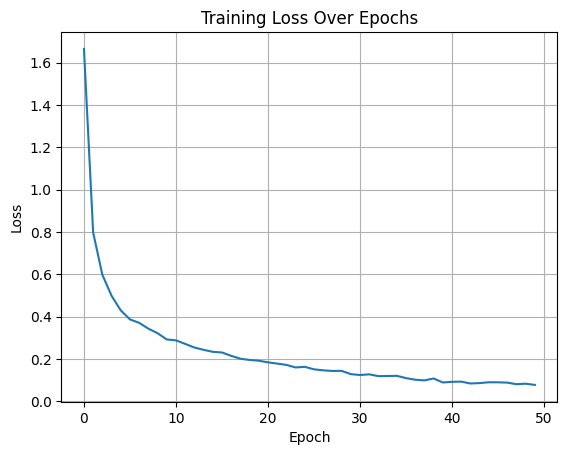


Final Test Accuracy: 95.15%


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/mnist_test-2.csv")
X = df.iloc[:, 1:].values / 255.0
Y = df.iloc[:, 0].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, Y_test), batch_size=64)

class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        return self.fc3(x)

model = DigitClassifier()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

num_epochs = 50
loss_values = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_X, batch_Y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_Y.size(0)
        correct += (predicted == batch_Y).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    loss_values.append(epoch_loss)
    print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.2f}%")

plt.plot(loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch_X, batch_Y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        total += batch_Y.size(0)
        correct += (predicted == batch_Y).sum().item()

test_acc = 100 * correct / total
print(f"\nFinal Test Accuracy: {test_acc:.2f}%")